In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Cargo el dataset

In [2]:
df = pd.read_csv(r'C:\Users\Mateio\Desktop\PP I\TP3_EDA_Academico\Alu_Carrera.csv', sep=';')
df.head()

,Num_Doc,Sexo,Fecha_Nac,Año_Ingreso,Semestre_Ingreso,Carrera,MaxCuatri,cPlan
0,0x4D59D95820BB9C20D119B096511A5DEE,M,1980-09-12 00:00:00,2000,1,RRHH,2,6
1,0x1D8A4FBCD76C78E2CD9B4C7839559F75,M,1980-09-20 00:00:00,2012,1,GCF,2,6
2,0x2AC5A3969A6F7BD628B4DF3DD6EA8CA3,F,1980-09-23 00:00:00,2013,2,RRHH,6,6
3,0xE10C333498164394ED8003BF58453071,F,1980-09-27 00:00:00,2000,1,DG,1,6
4,0xB8BDD2EDA6E86C1DE9173644C10F750B,M,1980-10-05 00:00:00,2005,1,MM,6,6


Creo columna auxiliar con el año de nacimiento para restar con la fecha de ingreso y obtener la columna Edad_Ingreso

In [3]:
df['Año_Nac']=pd.DatetimeIndex(df['Fecha_Nac']).year #Obtengo el año
df['Edad_Ingreso']=df['Año_Ingreso']- df['Año_Nac'] #Calculo la columna nueva
df = df.drop(['Año_Nac'], axis=1) #Dropeo la que no necesito
df.head()

,Num_Doc,Sexo,Fecha_Nac,Año_Ingreso,Semestre_Ingreso,Carrera,MaxCuatri,cPlan,Edad_Ingreso
0,0x4D59D95820BB9C20D119B096511A5DEE,M,1980-09-12 00:00:00,2000,1,RRHH,2,6,20.0
1,0x1D8A4FBCD76C78E2CD9B4C7839559F75,M,1980-09-20 00:00:00,2012,1,GCF,2,6,32.0
2,0x2AC5A3969A6F7BD628B4DF3DD6EA8CA3,F,1980-09-23 00:00:00,2013,2,RRHH,6,6,33.0
3,0xE10C333498164394ED8003BF58453071,F,1980-09-27 00:00:00,2000,1,DG,1,6,20.0
4,0xB8BDD2EDA6E86C1DE9173644C10F750B,M,1980-10-05 00:00:00,2005,1,MM,6,6,25.0


Creo la columna Desertor, valores 0 para los no desertores (alumnos que egresaron o que cursan actualmente) y 1 para los que efectivamente desertaron

In [4]:
df['Desertor'] = 0
conditions = [
    ((df['cPlan'] - df['MaxCuatri']) == 0),
    (df['Año_Ingreso'] == 2019) & ((df['cPlan'] - df['MaxCuatri']) <= 4),
    (df['Año_Ingreso'] == 2018) & ((df['cPlan'] - df['MaxCuatri']) <= 2)]
choices = ['0', '0', '0']
df['Desertor'] = np.select(conditions, choices, default=1)
df.head()

,Num_Doc,Sexo,Fecha_Nac,Año_Ingreso,Semestre_Ingreso,Carrera,MaxCuatri,cPlan,Edad_Ingreso,Desertor
0,0x4D59D95820BB9C20D119B096511A5DEE,M,1980-09-12 00:00:00,2000,1,RRHH,2,6,20.0,1
1,0x1D8A4FBCD76C78E2CD9B4C7839559F75,M,1980-09-20 00:00:00,2012,1,GCF,2,6,32.0,1
2,0x2AC5A3969A6F7BD628B4DF3DD6EA8CA3,F,1980-09-23 00:00:00,2013,2,RRHH,6,6,33.0,0
3,0xE10C333498164394ED8003BF58453071,F,1980-09-27 00:00:00,2000,1,DG,1,6,20.0,1
4,0xB8BDD2EDA6E86C1DE9173644C10F750B,M,1980-10-05 00:00:00,2005,1,MM,6,6,25.0,0


Calculo el año máximo de ingreso, es decir el ultimo año que tuvo alumnos la carrera, para ver cuales son activas y cuales no

In [5]:
aux1 = df.groupby('Carrera')
aux1 = aux1[['Año_Ingreso']].max()
aux1.columns = ['Max_Ingreso']
aux1.head()

,Max_Ingreso
Carrera,
3D,2019
AA,2019
ADMIN,2019
AR,2008
ATA,2007


Hago el merge con el dataframe anterior para poder analizar en conjunto

In [6]:
df=df.merge(aux1,on='Carrera')
df.head()

,Num_Doc,Sexo,Fecha_Nac,Año_Ingreso,Semestre_Ingreso,Carrera,MaxCuatri,cPlan,Edad_Ingreso,Desertor,Max_Ingreso
0,0x4D59D95820BB9C20D119B096511A5DEE,M,1980-09-12 00:00:00,2000,1,RRHH,2,6,20.0,1,2019
1,0x2AC5A3969A6F7BD628B4DF3DD6EA8CA3,F,1980-09-23 00:00:00,2013,2,RRHH,6,6,33.0,0,2019
2,0x79CAE6D33612665E22386E076857F0C0,M,1983-01-01 00:00:00,2001,1,RRHH,4,6,18.0,1,2019
3,0x3851E8E0764778BFBDC2B12B30F9FCC4,M,1980-09-15 00:00:00,2008,1,RRHH,1,6,28.0,1,2019
4,0x3286AB204A15E43C2F32F96B113A10E3,M,1981-01-21 00:00:00,2006,2,RRHH,2,6,25.0,1,2019


In [7]:
df['Max_Ingreso'] = np.where(df['Max_Ingreso']>=2017, 0, 1)
df.rename(columns={'Max_Ingreso': 'Inactiva'}, inplace=True)
df.head()

,Num_Doc,Sexo,Fecha_Nac,Año_Ingreso,Semestre_Ingreso,Carrera,MaxCuatri,cPlan,Edad_Ingreso,Desertor,Inactiva
0,0x4D59D95820BB9C20D119B096511A5DEE,M,1980-09-12 00:00:00,2000,1,RRHH,2,6,20.0,1,0
1,0x2AC5A3969A6F7BD628B4DF3DD6EA8CA3,F,1980-09-23 00:00:00,2013,2,RRHH,6,6,33.0,0,0
2,0x79CAE6D33612665E22386E076857F0C0,M,1983-01-01 00:00:00,2001,1,RRHH,4,6,18.0,1,0
3,0x3851E8E0764778BFBDC2B12B30F9FCC4,M,1980-09-15 00:00:00,2008,1,RRHH,1,6,28.0,1,0
4,0x3286AB204A15E43C2F32F96B113A10E3,M,1981-01-21 00:00:00,2006,2,RRHH,2,6,25.0,1,0


In [8]:
df.groupby('Carrera')['Inactiva'].unique().sum() #Cantidad de carreras inactivas

array([8])

### Analisis de datos y graficos

Por el IES, en carreras de 6 semestres, han pasado poco mas de 32 mil alumnos. El numero de varones y mujeres es similar, siendo levemente mayor el numero de hombres...

([<matplotlib.patches.Wedge at 0x1bf42397390>,
 [Text(0.15366293665874847, 1.089214258948812, 'Femenino'),
  Text(-0.1536629366587481, -1.089214258948812, 'Masculino')],
 [Text(0.08381614726840825, 0.5941168685175338, '45.54%  (14,638)'),
  Text(-0.08381614726840805, -0.5941168685175338, '54.46%  (17,506)')])

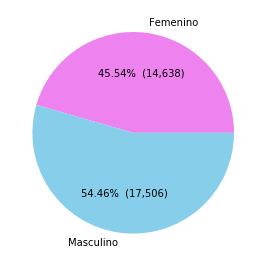

In [9]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots(figsize=(5, 4))
fig1.subplots_adjust(0.3,0,1,1)
values = df.groupby('Sexo')['Num_Doc'].count()
labels = ['Femenino', 'Masculino']
colors = ['Violet', 'SkyBlue']
plt.pie(values, labels= labels, colors= colors, autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(values)/100))

Esta proporcion fue igual en el tiempo? En el proximo grafico veremos que la tendencia es parecida entre hombres y mujeres año a año. Ademas, podemos observar que las barras van siendo mas bajas desde 2008 hasta 2018, que quiere decir? que la matricula de alumnos caia año a año. En 2019 se ve un leve repunte... pero el numero parece estable cerca de los 1000 nuevos alumnos anuales, lejos de los mas de 2000 de la epoca 2006-2009

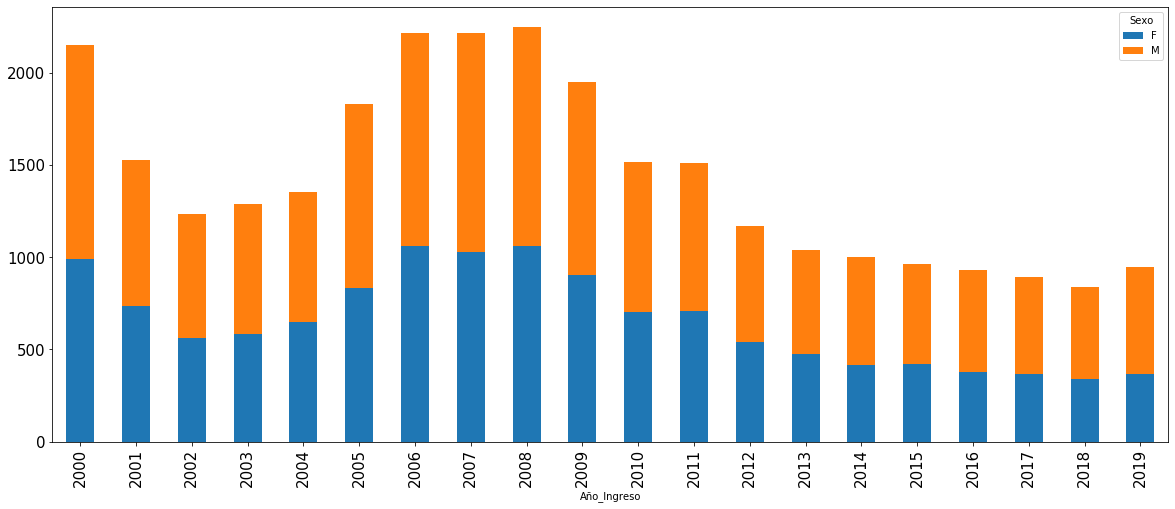

In [10]:
dfAno = df[df['Año_Ingreso']>1999]
dfAno.groupby(['Año_Ingreso','Sexo']).size().unstack().plot(kind='bar',stacked=True, figsize=(20,8), fontsize=15)
plt.show()


Veamos las edades de los ingresantes. La edad del ingresante de IES es a partir de los 18 años, siendo 19 la edad que mas se repite, lo que tiene logica en el negocio de la educacion superior, dado que los alumnos ingresan una vez finalizado el secundario a los 17/18 años. La tendencia es descentente, a medida que analizamos edades mayores, menos cantidad de ingresantes.. 

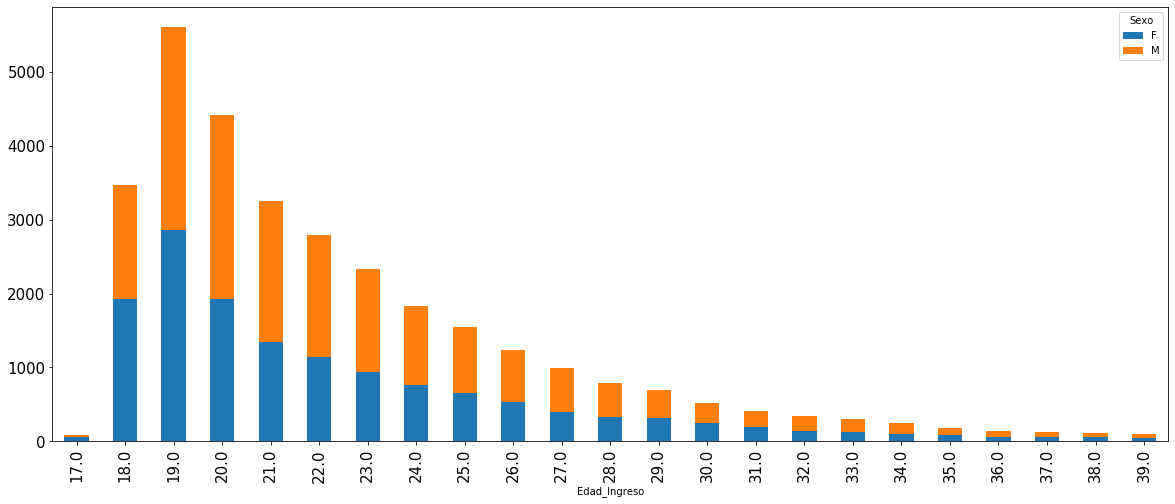

In [11]:
dfEdad = df[(df['Edad_Ingreso']>16) & (df['Edad_Ingreso'] < 40)]
dfEdad.groupby(['Edad_Ingreso','Sexo']).size().unstack().plot(kind='bar',stacked=True, figsize=(20,8), fontsize=15)
plt.show()

Seria interesante tener un panorama del ciclo de vida de nuestras carreras, es decir, cuanto tiempo llevan en la oferta, y las "inactivas" (criterio: carreras que no tienen ingresantes despues de 2017), ver desde cuando empezaron a serlo. La informacion se refleja en el grafico debajo...

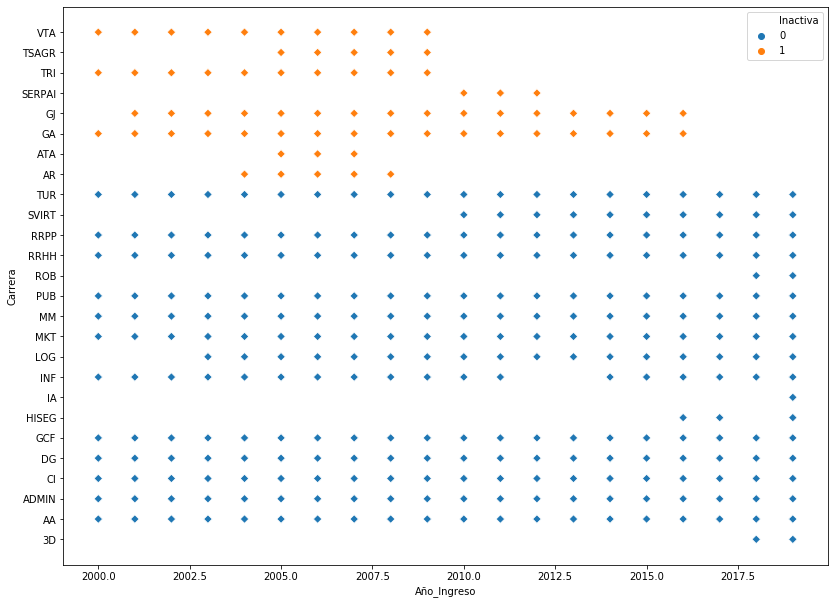

In [12]:
import seaborn as sns
import sidetable
dfaux3 = df.stb.freq(['Inactiva','Carrera','Año_Ingreso']) #Creo el cubo y selecciono
dfaux3 = dfaux3[(dfaux3['Año_Ingreso']>1999)] #Filtro porque tengo algun outlier
dfaux3= dfaux3.sort_values(['Inactiva','Carrera','Año_Ingreso']) #Ordeno para mostrar correctamente
a4_dims = (13.7, 10.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(ax=ax,data=dfaux3, x='Año_Ingreso', y='Carrera', hue='Inactiva', marker='D') #Hue le da color segun la columna

Los alumnos que se inscriben al instituto, lo hacen en alguna carrera dentro de las 20 que se ofrecen actualmente (27 total y 7 inactivas). Que peso tiene cada carrera en el total de alumnos? En la siguiente tabla y graficos veremos cantidades, porcentajes y sus respectivos acumulados. Vemos que entre las carreras DG, RRHH, ADMIN y MKT acumulan el 50% del alumnado, y que 8 carreras acumulan el 80% del total. El resto de las carreras se reparte el restante 20%.

In [13]:
import sidetable
df.stb.freq(['Carrera'], thresh=.8, other_label='Otras Carreras', style=True)

,Carrera,Count,Percent,Cumulative Count,Cumulative Percent
0,DG,"4,927",15.33%,"4,927",15.33%
1,RRHH,"4,177",12.99%,"9,104",28.32%
2,ADMIN,"3,618",11.26%,"12,722",39.58%
3,MKT,"3,327",10.35%,"16,049",49.93%
4,INF,"2,853",8.88%,"18,902",58.80%
5,AA,"2,002",6.23%,"20,904",65.03%
6,RRPP,"1,949",6.06%,"22,853",71.10%
7,PUB,"1,482",4.61%,"24,335",75.71%
8,MM,"1,189",3.70%,"25,524",79.41%
9,Otras Carreras,"6,620",20.59%,"32,144",100.00%


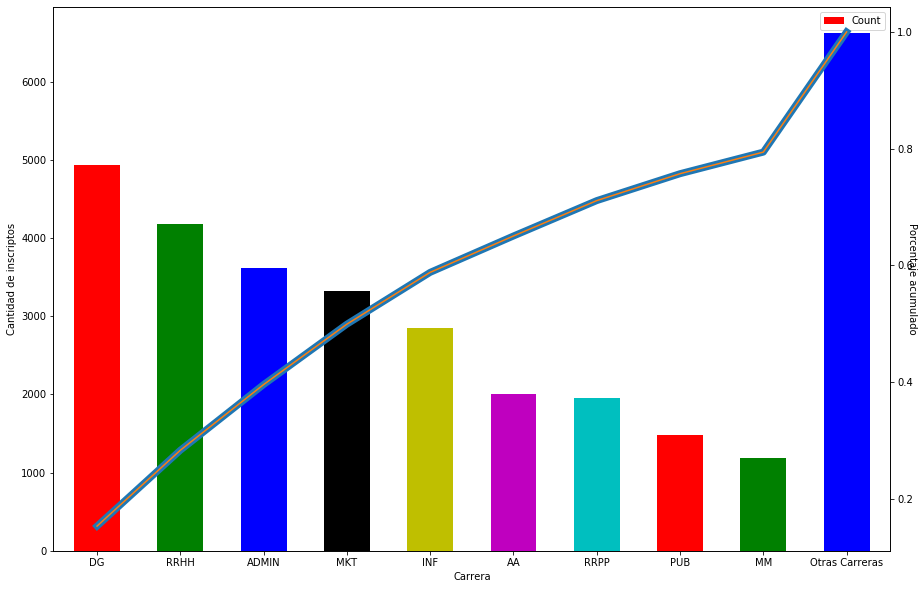

In [27]:
width = .55 # width of a bar

df6 = df.stb.freq(['Carrera'], thresh=.8, other_label='Otras Carreras')
df6 = df6.set_index('Carrera')
ax = df6[['Count']].plot(kind='bar', width = width, color='rgbkymc', figsize=(15,10));
df6['Cumulative Percent'].plot(secondary_y=True, linewidth=7)
 
ax.set_ylabel('Cantidad de inscriptos', fontsize=10);
df6['Cumulative Percent'].plot(ax=ax, secondary_y=True);


plt.xlabel('xlabel', fontsize=10)
plt.ylabel('Porcentaje acumulado', fontsize=10, rotation=-90)


plt.show()

La misma informacion pero solo limitada a los ultimos 5 años...

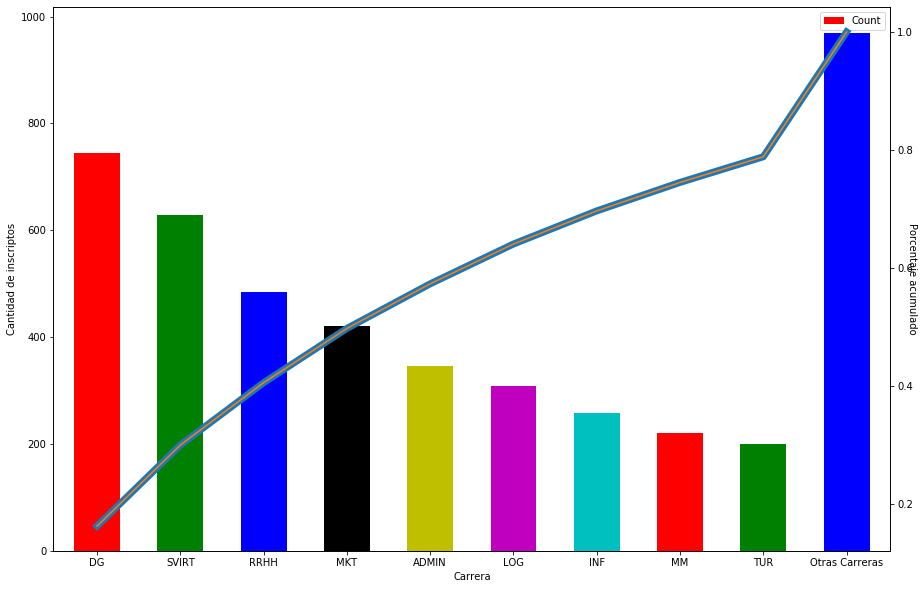

In [28]:
width = .55 # width of a bar
df6 =  df[df['Año_Ingreso']>2014]
df6 = df6.stb.freq(['Carrera'], thresh=.8, other_label='Otras Carreras')
df6 = df6.set_index('Carrera')
ax = df6[['Count']].plot(kind='bar', width = width, color='rgbkymc', figsize=(15,10));
df6['Cumulative Percent'].plot(secondary_y=True, linewidth=7)
 
ax.set_ylabel('Cantidad de inscriptos', fontsize=10);
df6['Cumulative Percent'].plot(ax=ax, secondary_y=True);


plt.xlabel('xlabel', fontsize=10)
plt.ylabel('Porcentaje acumulado', fontsize=10, rotation=-90)


plt.show()

En el año 2019...

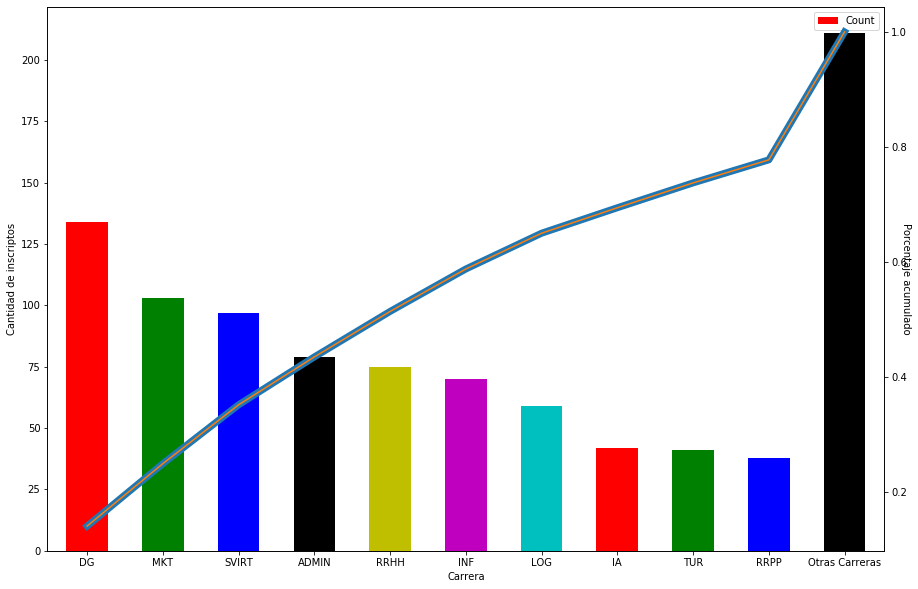

In [29]:
width = .55 # width of a bar
df6 =  df[df['Año_Ingreso']==2019]
df6 = df6.stb.freq(['Carrera'], thresh=.8, other_label='Otras Carreras')
df6 = df6.set_index('Carrera')
ax = df6[['Count']].plot(kind='bar', width = width, color='rgbkymc', figsize=(15,10));
df6['Cumulative Percent'].plot(secondary_y=True, linewidth=7)
 
ax.set_ylabel('Cantidad de inscriptos', fontsize=10);
df6['Cumulative Percent'].plot(ax=ax, secondary_y=True);


plt.xlabel('xlabel', fontsize=10)
plt.ylabel('Porcentaje acumulado', fontsize=10, rotation=-90)


plt.show()

Algo de lo que aun no hablamos es de los desertores. Consideramos Desertor a un alumno que por el tiempo transcurrido desde su ingreso al instituto deberia haber alcanzado un semestre que aun no alcanzo. Por ejemplo, ingreso en el 2005 y ultimo semestre cursado en 2009. Otro ejemplo: se inscribio en 2019 y ultimo semestre cursado es el segundo, esta Ok debido a que anualmente solo puede hacer dos semestres. Veamos la cantidad de ingresantes vs cantidad de desertores por año de ingreso..

Text(0.5, 1.0, 'Alumnos que desertaron vs los que permanecieron segun año de ingreso al instituto. Naranja: Desertores')

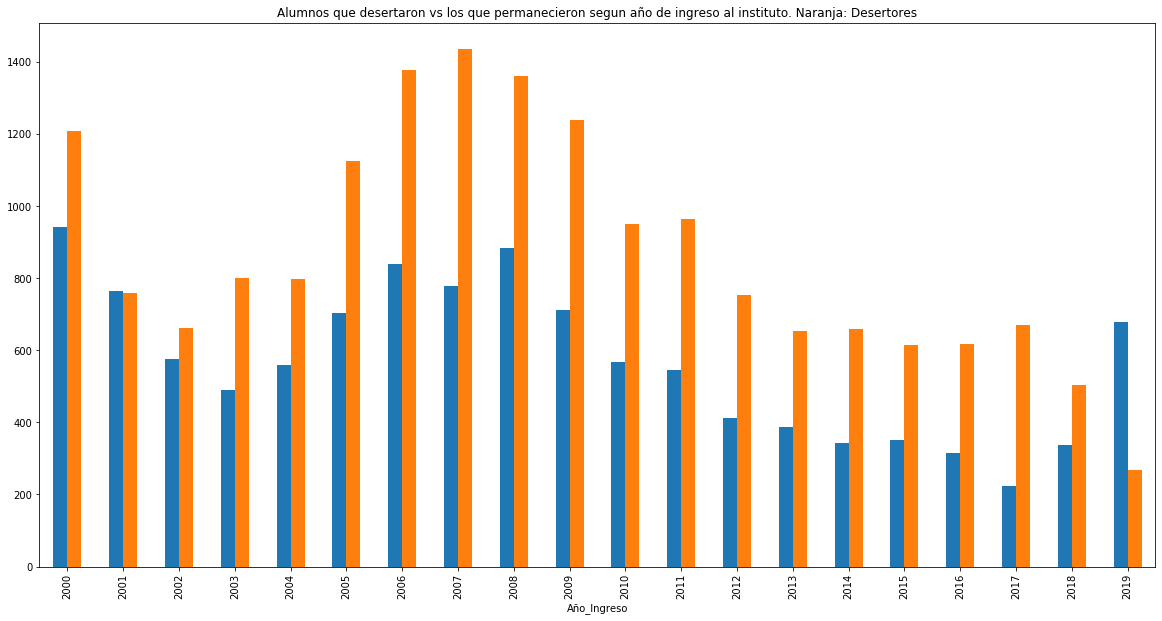

In [17]:
df70 =  df[df['Año_Ingreso']>1999]
pd.pivot_table(df70, values='Num_Doc', index=['Año_Ingreso','Desertor'], aggfunc='count').unstack().plot(kind='bar',figsize=(20,10),legend=False)
plt.title('Alumnos que desertaron vs los que permanecieron segun año de ingreso al instituto. Naranja: Desertores')

Ahora, veamos dentro de las carreras activas, que carreras tienen un porcentaje de permanencia/desersion mas alto o mas bajo que la media del instituto...

,Num_Doc,Sexo,Fecha_Nac,Año_Ingreso,Semestre_Ingreso,Carrera,MaxCuatri,cPlan,Edad_Ingreso,Desertor,Inactiva
0,0x4D59D95820BB9C20D119B096511A5DEE,M,1980-09-12 00:00:00,2000,1,RRHH,2,6,20.0,1,0
1,0x2AC5A3969A6F7BD628B4DF3DD6EA8CA3,F,1980-09-23 00:00:00,2013,2,RRHH,6,6,33.0,0,0
2,0x79CAE6D33612665E22386E076857F0C0,M,1983-01-01 00:00:00,2001,1,RRHH,4,6,18.0,1,0
3,0x3851E8E0764778BFBDC2B12B30F9FCC4,M,1980-09-15 00:00:00,2008,1,RRHH,1,6,28.0,1,0
4,0x3286AB204A15E43C2F32F96B113A10E3,M,1981-01-21 00:00:00,2006,2,RRHH,2,6,25.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
32139,0xB48995FDC16C3F93063DAED5021EF186,M,1993-05-01 00:00:00,2012,1,SERPAI,6,6,19.0,0,1
32140,0x55ECD89C90498559E88865E4C307D591,F,1993-06-07 00:00:00,2011,1,SERPAI,2,6,18.0,1,1
32141,0x5640EEC192CCB675A423623987D6F577,F,1973-05-26 00:00:00,2011,1,SERPAI,1,6,38.0,1,1
32142,0xBAFB910740E1728C0BA5D53B33EBE1F3,F,1970-10-11 00:00:00,2012,1,SERPAI,6,6,42.0,0,1


Para el proximo grafico, se sacan las carreras mas nuevas porque seria impreciso evaluar el nivel de desercion en estas

Text(0.5, 1.0, 'Porcentaje de desersion por carrera. Naranja: Desertores.')

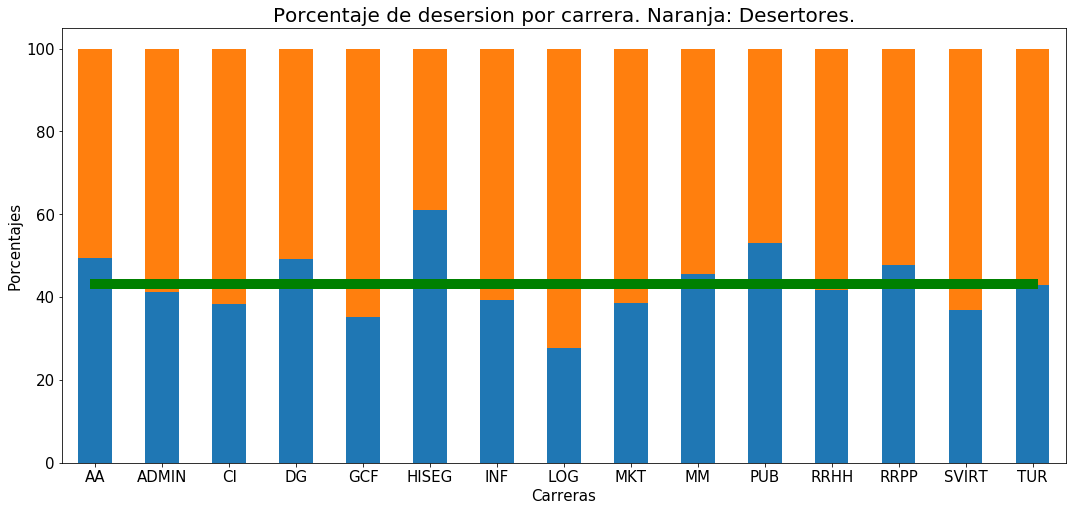

In [38]:
#df.groupby(['Carrera','Desertor'])['Num_Doc'].count()

#Hago una tabla pivot y obtengo el porcentaje de desertores de cada carrera
some_values = ['IA','ROB','3D']
Activas = df.loc[~df['Carrera'].isin(some_values)]

Activas =  Activas[Activas['Inactiva']==0]
table = pd.pivot_table(Activas, values='Num_Doc', index=['Carrera','Desertor'], aggfunc='count')

table['% sobre Carrera'] = round((table['Num_Doc'] / table.groupby(level=0)['Num_Doc'].transform(sum) * 100),2)
table = table.sort_values(["Carrera", "Desertor"], ascending = (True, False))

#Para calcular el promedio de desersion y graficar la linea...
#Hago lo siguiente para obtener solo los porcentaje de desertores, porque no me dejaba filtrar por indice de la pivot table
flattened = pd.DataFrame(table.to_records())
flattened = flattened[flattened['Desertor'] == '0']

PromedioDesersion = np.mean(flattened['% sobre Carrera'])
table['PromedioDesersion'] = round(PromedioDesersion,2)

#Grafico

ax = table['% sobre Carrera'].unstack().plot(kind='bar',stacked=True, figsize=(18,8), fontsize=15,legend=False)
table['PromedioDesersion'].unstack().plot(linewidth=10,ax=ax,color='g',legend=False)
plt.ylabel('Porcentajes', fontsize=15)
plt.xlabel('Carreras', fontsize=15)
plt.title('Porcentaje de desersion por carrera. Naranja: Desertores.', fontsize=20)


Vamos a profundizar informacion agregando datos de las materias cursadas, el semestre en el que se cursan y las calificaciones obtenidas...
En primer lugar 

In [19]:
dfMaterias = pd.read_csv(r'C:\Users\Mateio\Desktop\PP I\TP3_EDA_Academico\Alu_Materia.csv', sep=';')
dfMaterias.head()
dfMaterias=dfMaterias.merge(df,on='Num_Doc') #Hago merge entre el df alumnos y el df materias
dfMaterias.head()

,Num_Doc,Carrera_x,Año,Semestre,Materia,Nota1,Nota2,Nota3,Recup,Sexo,Fecha_Nac,Año_Ingreso,Semestre_Ingreso,Carrera_y,MaxCuatri,cPlan,Edad_Ingreso,Desertor,Inactiva
0,0x158153222B82FA55D9089394CC5B1029,AA,2002,1,ENTORNO ECONÓMICO,1.0,2.0,10.0,11.0,M,1981-12-27 00:00:00,2001,2,AA,2,6,20.0,1,0
1,0x158153222B82FA55D9089394CC5B1029,AA,2001,2,SISTEMAS DE INFORMACIÓN,4.0,2.0,10.0,5.0,M,1981-12-27 00:00:00,2001,2,AA,2,6,20.0,1,0
2,0x158153222B82FA55D9089394CC5B1029,AA,2001,2,RECURSOS INFORMÁTICOS,6.0,7.0,10.0,NaN,M,1981-12-27 00:00:00,2001,2,AA,2,6,20.0,1,0
3,0x158153222B82FA55D9089394CC5B1029,AA,2001,2,PRINCIPIOS DE ORGANIZACIÓN,6.0,7.0,10.0,NaN,M,1981-12-27 00:00:00,2001,2,AA,2,6,20.0,1,0
4,0x158153222B82FA55D9089394CC5B1029,AA,2002,1,GEOGRAFÍA ECONÓMICA,3.0,2.0,10.0,11.0,M,1981-12-27 00:00:00,2001,2,AA,2,6,20.0,1,0


In [20]:
dfMaterias.describe(include='all')

,Num_Doc,Carrera_x,Año,Semestre,Materia,Nota1,Nota2,Nota3,Recup,Sexo,Fecha_Nac,Año_Ingreso,Semestre_Ingreso,Carrera_y,MaxCuatri,cPlan,Edad_Ingreso,Desertor,Inactiva
count,587860,587860,587860.000000,587860.000000,587860,571488.000000,398347.000000,576841.000000,224465.000000,587860,587847,587860.000000,587860.000000,587860,587860.000000,587860.000000,587847.000000,587860,587860.000000
unique,30487,26,NaN,NaN,534,NaN,NaN,NaN,NaN,2,10344,NaN,NaN,26,NaN,NaN,NaN,2,NaN
top,0x56744AA342B8DE7BB2151795B727D84B,DG,NaN,NaN,RECURSOS INFORMÁTICOS,NaN,NaN,NaN,NaN,M,1984-01-01 00:00:00,NaN,NaN,DG,NaN,NaN,NaN,0,NaN
freq,252,97924,NaN,NaN,18517,NaN,NaN,NaN,NaN,309795,1143,NaN,NaN,96432,NaN,NaN,NaN,366785,NaN
mean,NaN,NaN,2008.368897,1.460411,NaN,6.859077,7.059272,8.528733,7.430584,NaN,NaN,2007.098835,1.163833,NaN,4.740253,5.963066,22.007764,NaN,0.035726
std,NaN,NaN,5.324692,0.498431,NaN,2.786181,2.595697,1.890600,3.011214,NaN,NaN,5.502768,0.370124,NaN,1.729790,0.281085,4.954315,NaN,0.185607
min,NaN,NaN,2000.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1976.000000,1.000000,NaN,1.000000,2.000000,-18.000000,NaN,0.000000
25%,NaN,NaN,2004.000000,1.000000,NaN,5.000000,5.000000,7.000000,5.000000,NaN,NaN,2003.000000,1.000000,NaN,4.000000,6.000000,19.000000,NaN,0.000000
50%,NaN,NaN,2008.000000,1.000000,NaN,7.000000,7.000000,9.000000,7.000000,NaN,NaN,2007.000000,1.000000,NaN,6.000000,6.000000,21.000000,NaN,0.000000
75%,NaN,NaN,2012.000000,2.000000,NaN,9.000000,9.000000,10.000000,11.000000,NaN,NaN,2011.000000,1.000000,NaN,6.000000,6.000000,24.000000,NaN,0.000000


Cambio los ausentes (11) por NaN para poder hacer calculos despues

In [21]:
dfMaterias['Nota1'] = np.where(dfMaterias['Nota1']==11, np.nan, dfMaterias['Nota1'])
dfMaterias['Nota2'] = np.where(dfMaterias['Nota2']==11, np.nan, dfMaterias['Nota2'])
dfMaterias['Nota3'] = np.where(dfMaterias['Nota3']==11, np.nan, dfMaterias['Nota3'])
dfMaterias['Recup'] = np.where(dfMaterias['Recup']==11, np.nan, dfMaterias['Recup'])
dfMaterias.head()

,Num_Doc,Carrera_x,Año,Semestre,Materia,Nota1,Nota2,Nota3,Recup,Sexo,Fecha_Nac,Año_Ingreso,Semestre_Ingreso,Carrera_y,MaxCuatri,cPlan,Edad_Ingreso,Desertor,Inactiva
0,0x158153222B82FA55D9089394CC5B1029,AA,2002,1,ENTORNO ECONÓMICO,1.0,2.0,10.0,NaN,M,1981-12-27 00:00:00,2001,2,AA,2,6,20.0,1,0
1,0x158153222B82FA55D9089394CC5B1029,AA,2001,2,SISTEMAS DE INFORMACIÓN,4.0,2.0,10.0,5.0,M,1981-12-27 00:00:00,2001,2,AA,2,6,20.0,1,0
2,0x158153222B82FA55D9089394CC5B1029,AA,2001,2,RECURSOS INFORMÁTICOS,6.0,7.0,10.0,NaN,M,1981-12-27 00:00:00,2001,2,AA,2,6,20.0,1,0
3,0x158153222B82FA55D9089394CC5B1029,AA,2001,2,PRINCIPIOS DE ORGANIZACIÓN,6.0,7.0,10.0,NaN,M,1981-12-27 00:00:00,2001,2,AA,2,6,20.0,1,0
4,0x158153222B82FA55D9089394CC5B1029,AA,2002,1,GEOGRAFÍA ECONÓMICA,3.0,2.0,10.0,NaN,M,1981-12-27 00:00:00,2001,2,AA,2,6,20.0,1,0


Veamos, a grandes rasgos las calificaciones del alumno promedio de IES. Del siguiente grafico podemos ver que el 50% de los alumnos tiene calificacion promedio de entre 6 y 8 puntos sobre 10. un 25% por arriba y un 25% por debajo de 6.

C:\Users\Mateio\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


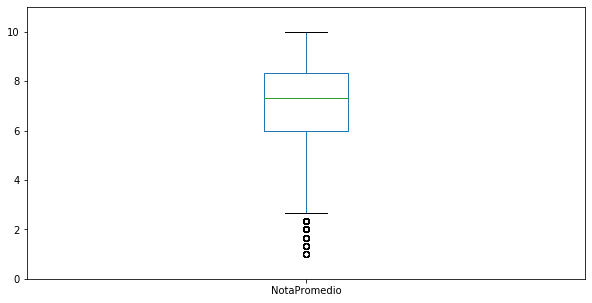

In [22]:
AluPromedio = dfMaterias[dfMaterias['Inactiva'] == 0]
AluPromedio['NotaPromedio'] = (AluPromedio['Nota1'] + AluPromedio['Nota2'] + AluPromedio['Nota3']) / 3
AluPromedio['NotaPromedio'].plot(kind='box', figsize = (10,5),ylim=(0,11))

Veamos si el alumno promedio de IES varia en sus calificaciones segun el semestre.
El grafico pareciera indicar que la variacion es leve o nula, siguiendo la tendencia de que en la segunda instancia evaluativa (IEFI), el alumno tiende a tener una mejor calificacion que en la primera, y en los trabajos practicos una sacando buena nota. Y para el caso que le toque recuperar... lo mas probable es que apruebe, logrando la regularidad. El sexo es una variable que defina el rendimiento academico? Pareciera que las mujeres presentan notas levemente superiores en promedio

C:\Users\Mateio\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


Text(0.5, 1.0, 'Notas promedio segun semestre en que se cursa la materia')

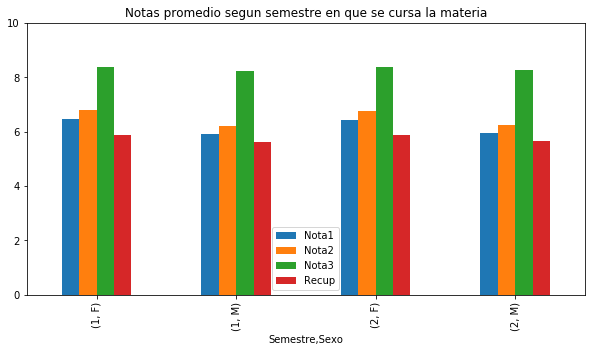

In [23]:
dfMaterias
dfMaterias.groupby(['Semestre','Sexo'])['Nota1','Nota2','Nota3','Recup'].mean().plot(kind='bar',ylim=(0,10),figsize=(10,5))
plt.title('Notas promedio segun semestre en que se cursa la materia')

Un disparador en este punto puede ser: Los desertores lo hacen por una cuestion de dificultad en las materias?

Segun se ve en el proximo grafico, el comportamiento academico de los desertores... Nada mal, verdad? Parece ser que la razon no tiene que no es una cuestion de dificultad de las materias en la mayoria de los casos...

C:\Users\Mateio\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


Text(0.5, 1.0, 'Notas promedio segun semestre en que se cursa la materia de ALUMNOS DESERTORES')

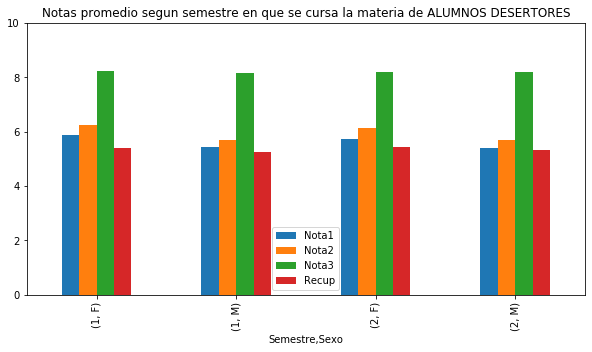

In [24]:
Desert = dfMaterias[dfMaterias['Desertor'] == '1']
Desert.groupby(['Semestre','Sexo'])['Nota1','Nota2','Nota3','Recup'].mean().plot(kind='bar',ylim=(0,10),figsize=(10,5))
plt.title('Notas promedio segun semestre en que se cursa la materia de ALUMNOS DESERTORES')


Y por carrera? Cual es el rendimiento academico promedio por carrera? Si vemos en el grafico siguiente, no tenemos diferencias significativas de rendimiento de los alumnos entre carreras activas del instituto

C:\Users\Mateio\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'Notas promedio de alumnos en las carreras activas del instituto')

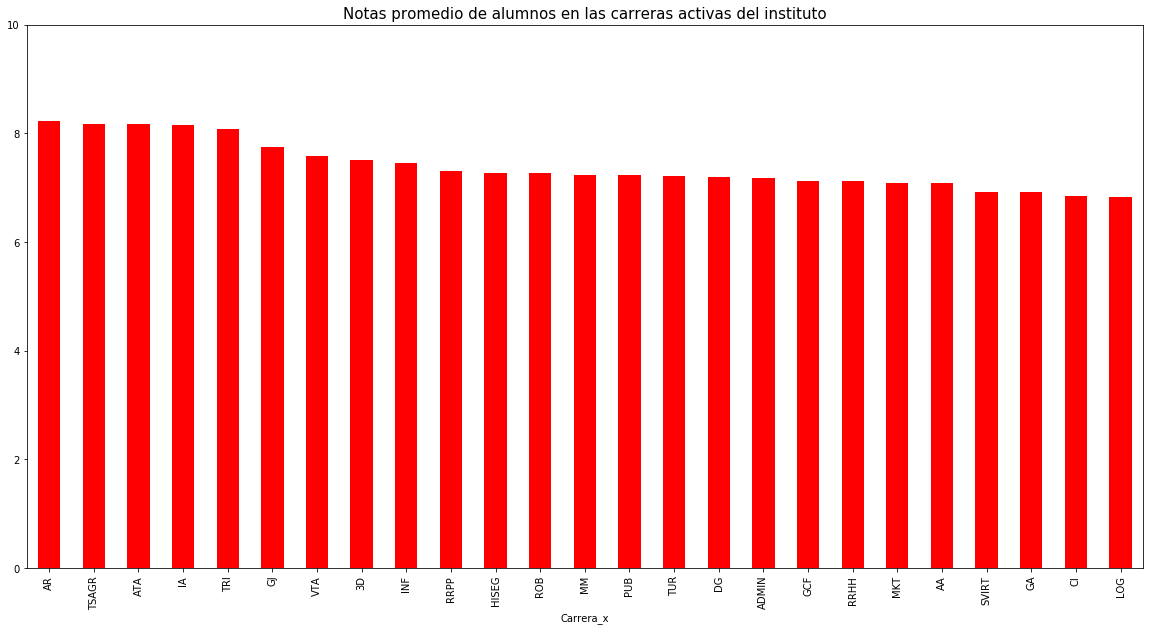

In [25]:
RendxCarrera = dfMaterias[dfMaterias['Inactiva'] == 0]
RendxCarrera['NotaPromedio'] = (RendxCarrera['Nota1'] + RendxCarrera['Nota2'] + RendxCarrera['Nota3']) / 3
RendxCarrera.groupby('Carrera_x')['NotaPromedio'].mean().sort_values(ascending=False).plot(kind='bar', color= 'red',figsize = (20,10),ylim=(0,10))
plt.title('Notas promedio de alumnos en las carreras activas del instituto', fontsize= 15)